In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

/kaggle/input/pokemon/Pokemon.csv


In [2]:
df = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv') #importing our dataset

In [3]:
df.head() #checking the head of our data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df['Type 1'].value_counts() #checking the value count of type 1 of pokemons

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [6]:
df['Type 2'].value_counts() #checking value count of type 2 of pokemons

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ice         14
Rock        14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [7]:
df['Legendary'].value_counts() #checking the number of legendary pokemons in our data

False    735
True      65
Name: Legendary, dtype: int64

In [8]:
df.isnull().sum() #checking for null values in our data

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
df.describe().T #calling the describe method on our data

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [10]:
def filltype(): #method to fill the null values of type 2 with type 1 as the pokemon might only have one type instead of ddropping the null values we can just replace them with the primary type of the pokemon
    df['Type 2'].fillna(df['Type 1'],inplace = True)

In [11]:
df.isnull().sum() #no null values in our data set now

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

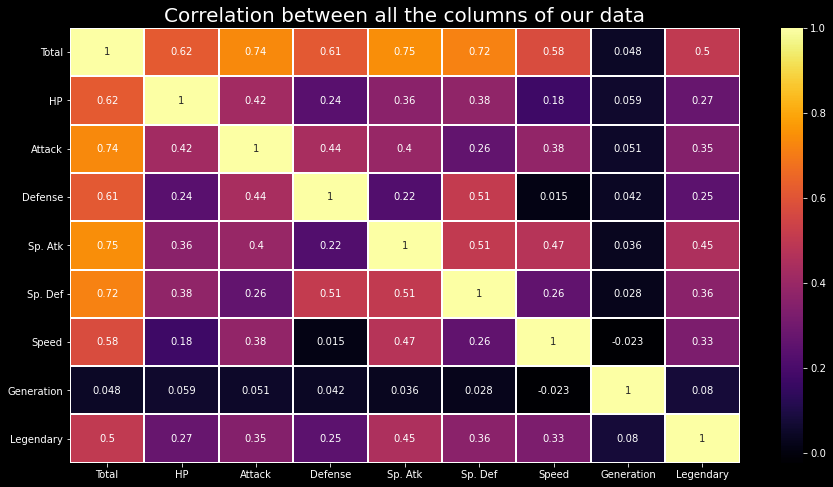

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
corr=sns.heatmap(df[[ 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr(), annot = True, linewidths=1, cmap='inferno')
corr.set_title(label='Correlation between all the columns of our data', fontsize=20)
plt.show()

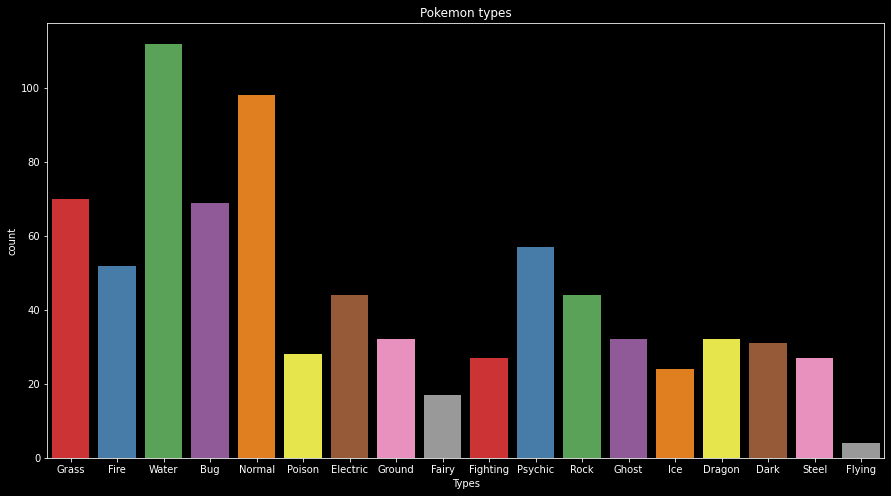

In [13]:
plt.figure(figsize=(15,8)) #count of type 1 pokemons
sns.countplot(df['Type 1'],palette='Set1')
plt.xlabel('Types')
plt.title('Pokemon types')
plt.show()

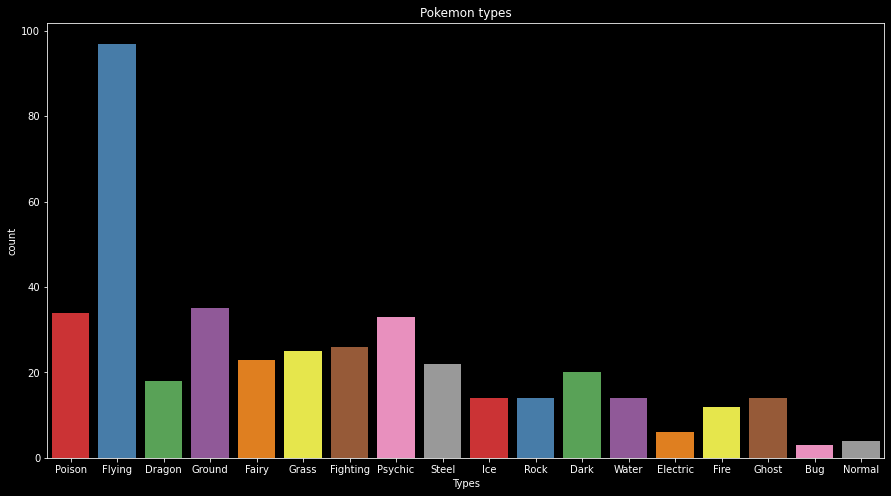

In [14]:
plt.figure(figsize=(15,8)) #count of type 2 pokemons
sns.countplot(df['Type 2'],palette='Set1')
plt.xlabel('Types')
plt.title('Pokemon types')
plt.show()

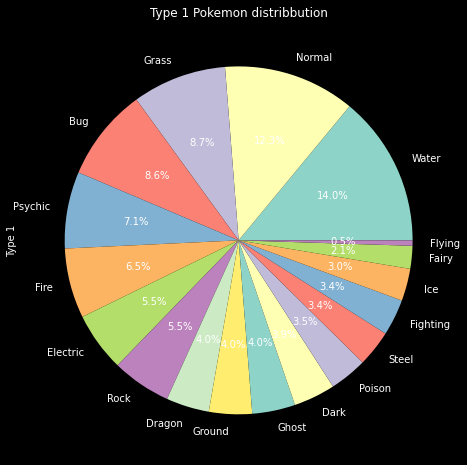

In [15]:
plt.title("Type 1 Pokemon distribbution")
df['Type 1'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15,8)) #distribution according to the rating
plt.show()

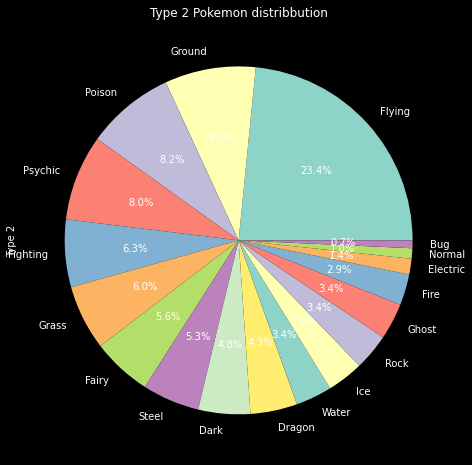

In [16]:
plt.title("Type 2 Pokemon distribbution")
df['Type 2'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15,8)) #distribution according to the rating
plt.show()

<Figure size 1080x576 with 0 Axes>

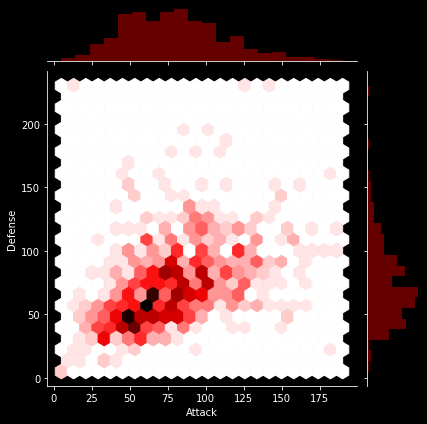

In [17]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Attack",y="Defense",data=df,kind="hex",color="red");

<Figure size 1080x576 with 0 Axes>

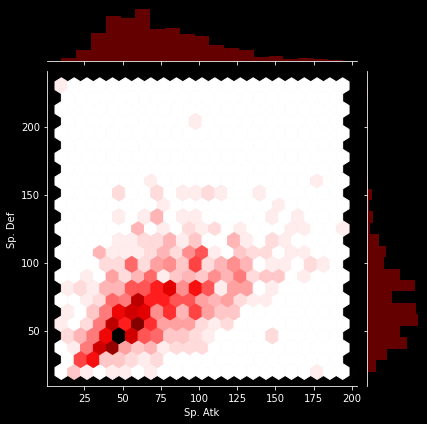

In [18]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Sp. Atk", y="Sp. Def", data=df,kind ="hex",color = 'red'); #comparing special attack and speed

<Figure size 1080x576 with 0 Axes>

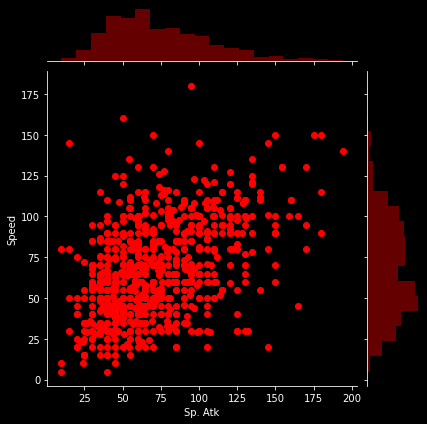

In [19]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Sp. Atk",y="Speed",data=df,color="red");

<Figure size 1080x576 with 0 Axes>

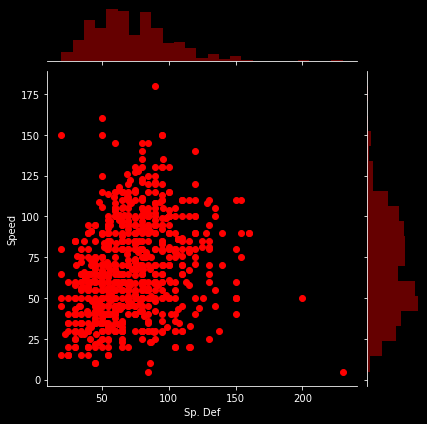

In [20]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Sp. Def", y="Speed", data=df,color = 'red'); #comparing special Defense and speed

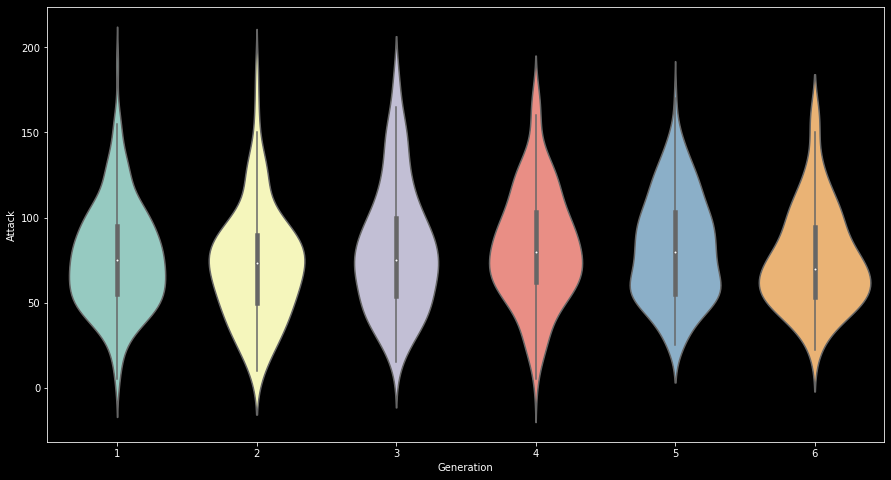

In [21]:
plt.figure(figsize=(15,8))
sns.violinplot(x="Generation",y="Attack",data = df)

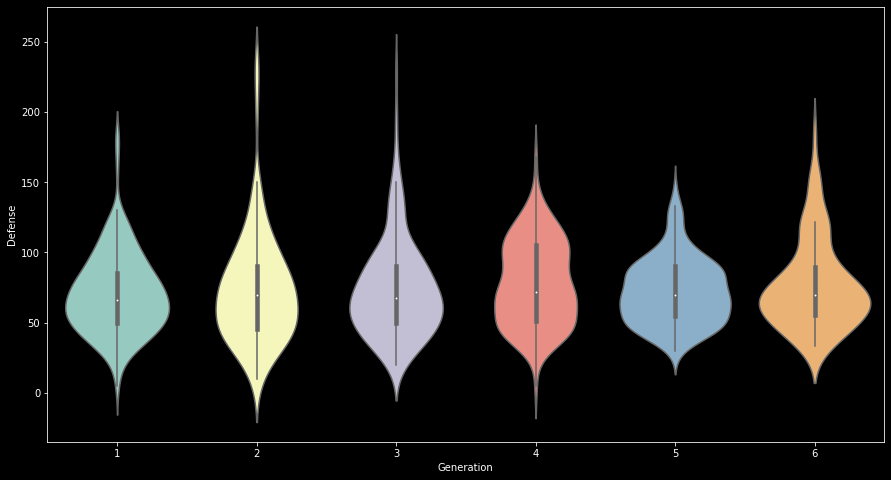

In [22]:
plt.figure(figsize=(15,8))
sns.violinplot(x="Generation",y="Defense",data = df)

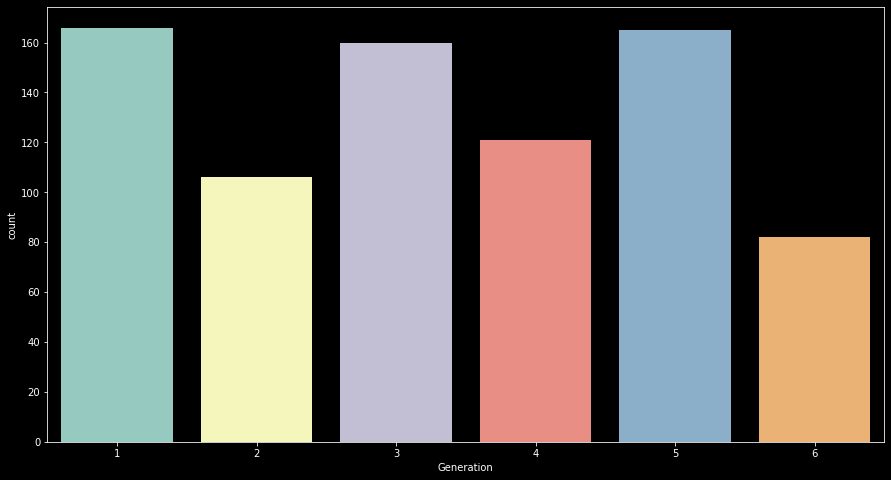

In [23]:
plt.figure(figsize=(15,8)) #checking the number of pokemons from each generation
sns.countplot(x='Generation',data=df)
plt.show()

In [24]:
df[df['HP']>150][['Name','Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Total']].sort_values(by = 'HP',ascending = False).head(5) #top 5 pokemons with highest HP

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
261,Blissey,Normal,255,10,10,75,135,55,2,540
121,Chansey,Normal,250,5,5,35,105,50,1,450
217,Wobbuffet,Psychic,190,33,58,33,58,33,2,405
351,Wailord,Water,170,90,45,90,45,60,3,500
655,Alomomola,Water,165,75,80,40,45,65,5,470


In [25]:
df[df['Attack']>150][['Name','Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Total']].sort_values(by = 'Attack',ascending = False).head(5) #top 5 pokemons with highest Attack

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
163,MewtwoMega Mewtwo X,Psychic,106,190,100,154,100,130,1,780
232,HeracrossMega Heracross,Bug,80,185,115,40,105,75,2,600
426,RayquazaMega Rayquaza,Dragon,105,180,100,180,100,115,3,780
424,GroudonPrimal Groudon,Ground,100,180,160,150,90,90,3,770
429,DeoxysAttack Forme,Psychic,50,180,20,180,20,150,3,600


In [26]:
df[df['Defense']>180][['Name','Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Total']].sort_values(by = 'Defense',ascending = False).head(5) #top 5 pokemons with highest Defense

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
224,SteelixMega Steelix,Steel,75,125,230,55,95,30,2,610
230,Shuckle,Bug,20,10,230,10,230,5,2,505
333,AggronMega Aggron,Steel,70,140,230,60,80,50,3,630
223,Steelix,Steel,75,85,200,55,65,30,2,510
414,Regirock,Rock,80,100,200,50,100,50,3,580


In [27]:
df[df['Speed']>130][['Name','Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Total']].sort_values(by = 'Speed',ascending = False).head(5) #top 5 pokemons with highest Speed

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
431,DeoxysSpeed Forme,Psychic,50,95,90,95,90,180,3,600
315,Ninjask,Bug,61,90,45,50,50,160,3,456
71,AlakazamMega Alakazam,Psychic,55,50,65,175,95,150,1,590
154,AerodactylMega Aerodactyl,Rock,80,135,85,70,95,150,1,615
428,DeoxysNormal Forme,Psychic,50,150,50,150,50,150,3,600


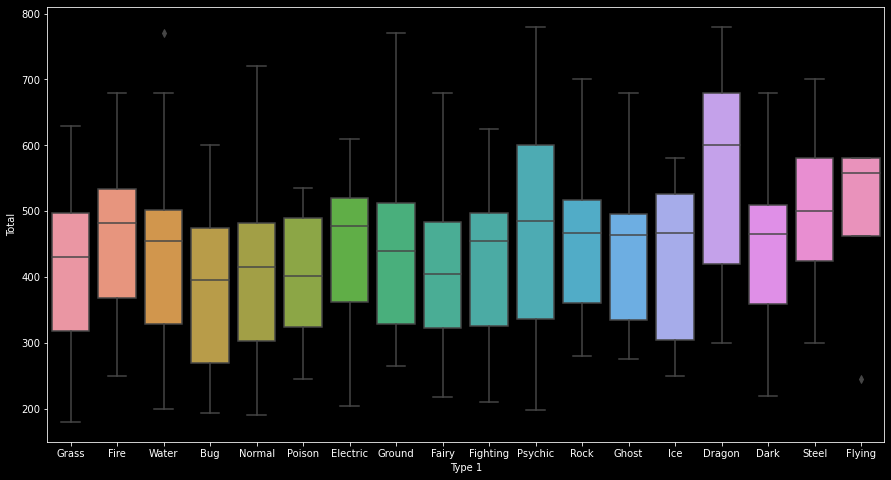

In [28]:
plt.figure(figsize=(15,8)) #comparing total scores of different types in Type 1
sns.boxplot(x = df['Type 1'],y = df['Total'])

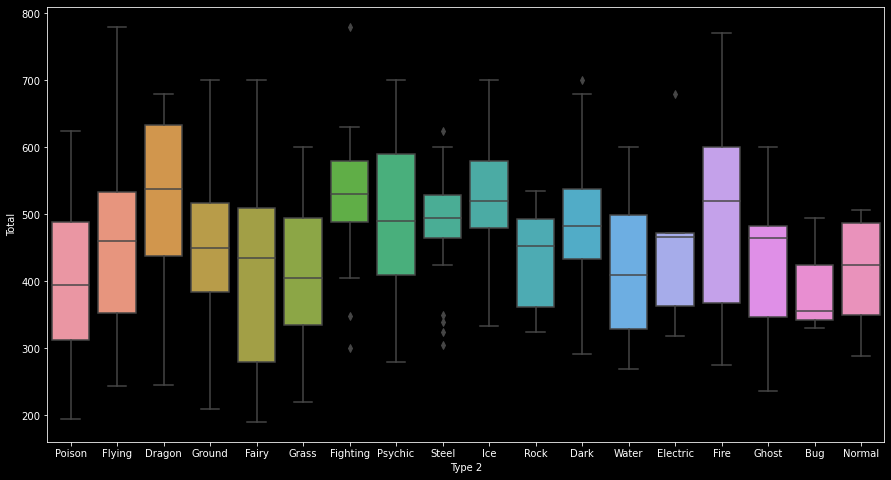

In [29]:
plt.figure(figsize=(15,8)) #comparing total scores of different types in Type 2
sns.boxplot(x = df['Type 2'],y = df['Total'])

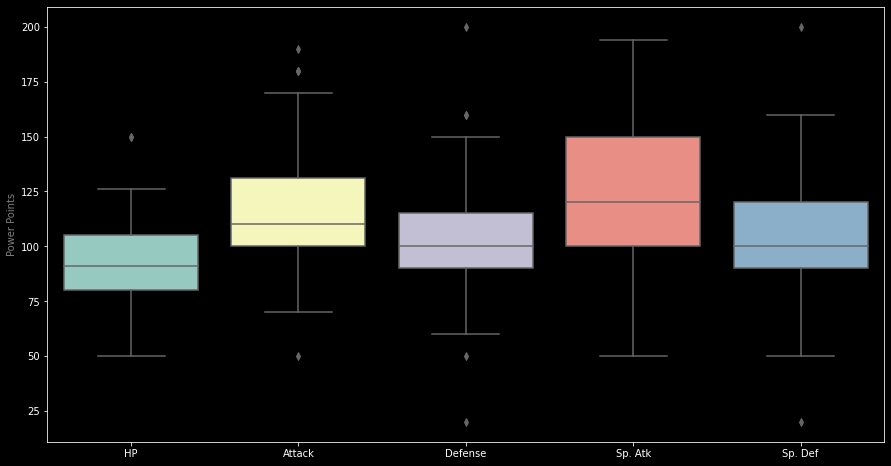

In [30]:
legend = df[df["Legendary"]] #comparing attributes of different legendary pokemons
legend = legend[["HP","Attack","Defense","Sp. Atk","Sp. Def"]]
fig = plt.figure(figsize= (15,8))
sns.boxplot(data=legend)
plt.ylabel("Power Points",color="grey")
plt.show()

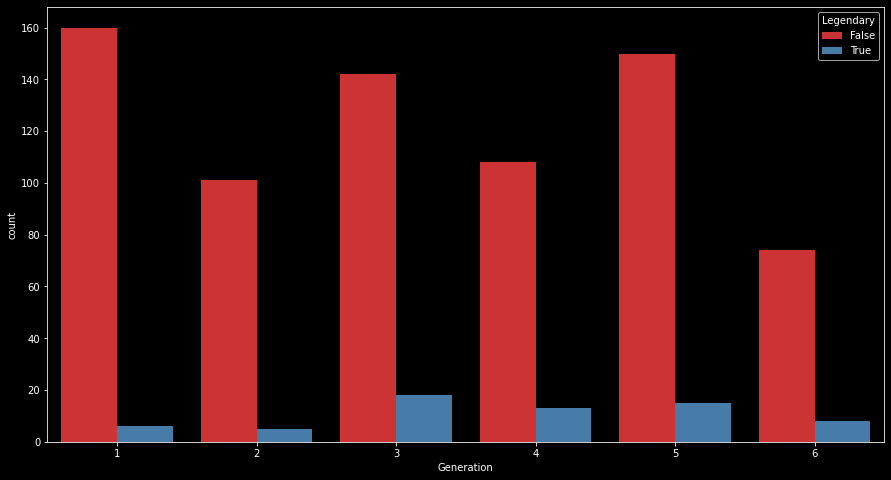

In [31]:
plt.figure(figsize=(15,8)) #distribution of legends according to their generations
plot = sns.countplot(x='Generation',data=df,hue='Legendary',palette="Set1")

In [32]:
def compare(p1,p2,c): #method to compare any attributes of two pokemons
    comp = df[(df.Name == p1) | (df.Name ==p2)]
    sns.barplot(x='Name',y=c,data=comp,palette="Set1")

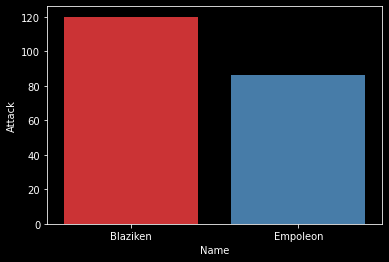

In [33]:
compare('Blaziken','Empoleon','Attack')

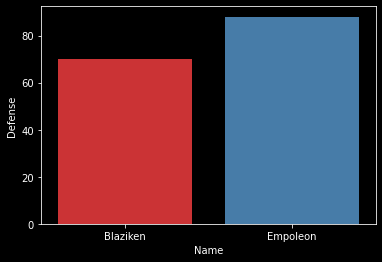

In [34]:
compare('Blaziken','Empoleon','Defense')

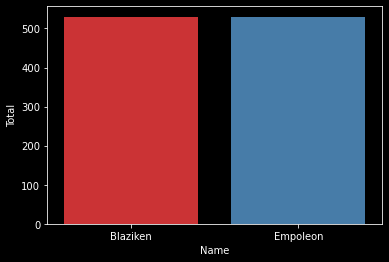

In [35]:
compare('Blaziken','Empoleon','Total')

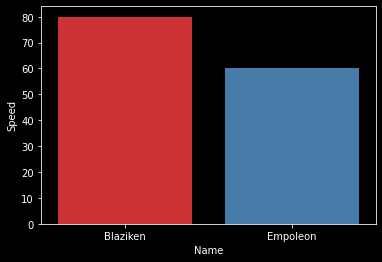

In [36]:
compare('Blaziken','Empoleon','Speed')

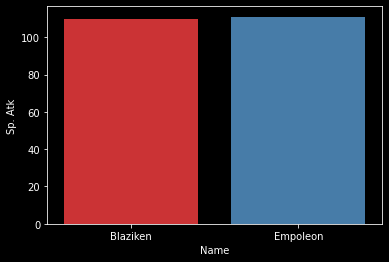

In [37]:
compare('Blaziken','Empoleon','Sp. Atk')

In [38]:
def PokeFight(p1,p2,p3,p4,p5): #method to compare overall power of any 5 pokemons of your choice
    x = df[df["Name"] == p1]
    trace1 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
      fill = 'toself',
      name = p1
    )
    x = df[df["Name"] == p2]
    trace2 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
      fill = 'toself',
      name = p2
    )
    x = df[df["Name"] == p3]
    trace3 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
      fill = 'toself',
      name = p3
    )
    x = df[df["Name"] == p4]
    trace4 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
      fill = 'toself',
      name = p4
    )
    x = df[df["Name"] == p5]
    trace5 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
      fill = 'toself',
      name = p5
    )
    
    layout = go.Layout(
      xaxis=dict(
            domain=[0, 0.45]
        ),
        yaxis=dict(
            domain=[0, 0.45]
        ),
        xaxis2=dict(
            domain=[0.55, 1]
        ),
        xaxis3=dict(
            domain=[0, 0.45],
            anchor='y3'
        ),
        xaxis4=dict(
            domain=[0.55, 1],
            anchor='y4'
        ),
        yaxis2=dict(
            domain=[0, 0.45],
            anchor='x2'
        ),
        yaxis4=dict(
            domain=[0.55, 1],
            anchor='x4'
        ),
        
      showlegend = True,
      title = "Pokémons' Performance"
    )

    data = [trace1, trace2, trace3,trace4,trace5]
    fig = go.Figure(data=data, layout=layout)

    iplot(fig, filename = "Pokemon stats")
    

In [39]:
PokeFight("Raichu","Charizard","Venusaur","Blastoise","Blaziken") #comparing the overall attributes of the pokemon

This concludes my EDA on the Pokemon Data set. I will be applying some classification algorithms on this in future.

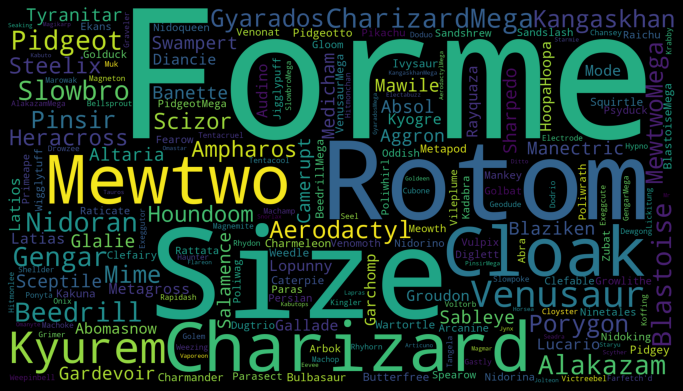

In [40]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

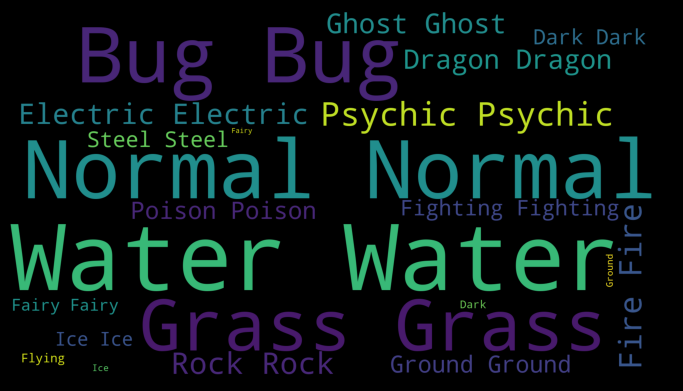

In [41]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df['Type 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()